<a href="https://colab.research.google.com/github/singhvarun404/AIML_2020/blob/master/August_20th_MNIST_Image_Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
date = 20
topic = "Image Classification using Neural Network"
print("Date: August {}\nTopic: {}".format(date,topic))

Date: August 20
Topic: Image Classification using Neural Network


In [3]:
import matplotlib.pyplot as plt
import tensorflow.keras as tf
import numpy as np

In [4]:
mnist = tf.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train[10]

3

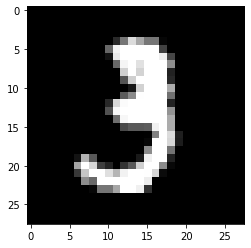

In [7]:
plt.imshow(x_train[10],cmap='gray')
plt.show()

**Creating a Neural Network**

In [8]:
### Creating the model
model = tf.models.Sequential()

### Adding layers to nn
model.add(tf.layers.Flatten())   ###--->Input layer
model.add(tf.layers.Dense(784,activation = 'relu'))  ###--->Hidden layer
model.add(tf.layers.Dense(10,activation = 'softmax')) ###--->Output layer

In [9]:
### Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


**Training the NN**

In [10]:
### Scaling the data(Normalization)
x_train = x_train/255
x_test = x_test/255

In [11]:
### Training the model
model.fit(x_train,y_train,epochs=15)   ### epochs: no. of iterations

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1898 - accuracy: 0.9440
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0769 - accuracy: 0.9764
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0501 - accuracy: 0.9840
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0341 - accuracy: 0.9892
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0263 - accuracy: 0.9915
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - accuracy: 0.9927
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - lo

**Testing and Evaluating**

In [12]:
y_pred = model.predict(x_test)  ### Predicting on test set
y_pred[20]

array([3.1777288e-13, 2.1618480e-11, 1.9303165e-15, 6.3780087e-10,
       6.2133043e-10, 4.0383615e-08, 3.1864104e-19, 1.5748959e-05,
       1.1169706e-11, 9.9998426e-01], dtype=float32)

In [13]:
y_test[20]

9

In [14]:
np.argmax(y_pred[20])

9

In [22]:
from tensorflow.math import confusion_matrix
from tensorflow.keras.metrics import categorical_accuracy

In [23]:
y_pred_cl = []
for i in y_pred:
  y_pred_cl.append(np.argmax(i))
y_pred_class = np.array(y_pred_cl)

In [24]:
conf = confusion_matrix(y_test,y_pred_class,num_classes=10)
conf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    3,    1,    1,    2,    1,    1,    0,    0],
       [   2, 1123,    3,    0,    0,    0,    2,    0,    5,    0],
       [   2,    3, 1021,    4,    1,    0,    0,    1,    0,    0],
       [   0,    0,    4, 1001,    0,    2,    0,    2,    1,    0],
       [   2,    0,    5,    0,  953,    1,    4,    1,    1,   15],
       [   2,    0,    0,    9,    0,  874,    4,    0,    1,    2],
       [   4,    2,    1,    1,    1,    2,  946,    0,    1,    0],
       [   3,    1,   11,    2,    0,    0,    0, 1000,    3,    8],
       [   4,    0,   12,   13,    3,    5,    2,    3,  926,    6],
       [   2,    2,    0,    4,    2,    5,    1,    0,    0,  993]],
      dtype=int32)>

In [32]:
acc = tf.metrics.Accuracy()
acc.update_state(y_test,y_pred_class)
acc.result().numpy()

0.9807